https://school.programmers.co.kr/learn/courses/30/lessons/81302

### 숨거리두기 확인하기
#### 문제 파악
- 대기실은 5개이며, 각 대기실은 5x5 크기
- 거리두기를 위하여 응시자들 끼리는 맨해튼 거리1가 2 이하로 앉지 말아 주세요.
- 단, 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용한다.<br/><br/>
- 응시자가 앉아있는 자리(P)를 의미
- 빈 테이블(O)을 의미
- 파티션(X)을 의미<br/><br/>
- 자리에 앉아있는 응시자들의 정보와 대기실 구조를 대기실별로 담은 2차원 문자열 배열 places가 매개변수
- 각 대기실별로 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0을 배열에 담아 return 하도록 solution 함수를 완성해라

##### 주의
- 파티션이 존재한다면 맨해튼 거리가 2여도 거리두기를 지킨 것
- 맨해튼 거리 2이고 사이에 빈 테이블이 있는 경우는 거리두기를 지키지 않은 것

##### 제한
- 정확성 테스트 : 10초
- 두 테이블 T1, T2가 행렬 (r1, c1), (r2, c2)에 각각 위치하고 있다면, T1, T2 사이의 맨해튼 거리는 |r1 - r2| + |c1 - c2| 입니다. <br/><br/>

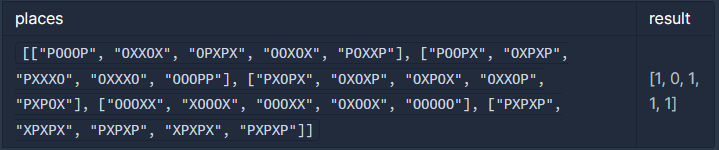

In [1]:
def solution(places):
    answer = [] #결과값을 담는 리스트
    #P의 위치에서 확인해봐야할 근처 좌표들
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    diagonal_x = [-1, -1, 1, 1]
    diagonal_y = [-1, 1, -1, 1]

    #P:응시자가 앉아있는 자리
    #O:빈테이블
    #X:파티션

    def check(array, x, y):
        # 수직, 수평 확인
        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]
            if 0 <= nx < 5 and 0 <= ny < 5 and array[nx][ny] == 'P':
                return False

        # 대각선 확인
        for i in range(4):
            nx, ny = x + diagonal_x[i], y + diagonal_y[i]
            if 0 <= nx < 5 and 0 <= ny < 5 and array[nx][ny] == 'P':
                # 응시자 간의 맨해튼 거리가 2 이하인 경우
                if abs(nx - x) + abs(ny - y) <= 2:
                    # 대각선 방향으로 바로 옆에 응시자가 있는 경우
                    if array[x][ny] == array[nx][y] == 'O':
                        return False
        return True

    for place in places:
        array = [list(row) for row in place]
        find = False #조건 충족하는 응시자를 찾았냐

        for i in range(5):
            for j in range(5):
                if array[i][j] == 'P':
                    if not check(array, i, j):
                        find = True
                        break
            if find:
                break

        if find: #find=False일 경우
            answer.append(0)
        else: #find=True일 경우
            answer.append(1)

    return answer

# 테스트
places = [
    ["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"],
    ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"],
    ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"],
    ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"],
    ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]

print(solution(places))

[1, 0, 1, 1, 1]
